# **IC - TCC (Heitor)**
## **Dataset**:
Estamos estudando o dataset PlantVillage em um problema de classificação. Esse dataset é fruto do trabalho dos pesquisadores: David. P. Hughes e Marcel Salathe em artigo intulado "An open access repository of images on plant health to enable the development of mobile disease diagnostics" de novembro de 2015. Infelizmente, a versão original desse dataset não está disponível na web. Então, obtemos esses dados via o seguinte link: [Dataset](https://data.mendeley.com/datasets/tywbtsjrjv/1). 

Esse dataset é O mais utilizado em problemas de classificação envolvendo Visão Computacional aplicada ao domínio da agricultura.Prova disso são as cerca de 1190 citações que o paper de Hughes e Salathe possui e as 60926 visualizações e 25728 downloads desse dataset no site da Mendeley. Isso demonstra a importância de se estudar a qualidade desses dados. 

Ainda, temos uma versão com data augmentation desse mesmo dataset. Contudo, tal versão não é contemplada nesse estudo.

## **Análise do dataset**
### **Classes**
Esse dataset é constituído de 55448 imagens divididas em 39 classes. As classes são:
- Soybean___healthy
- Peach___healthy
- Strawberry___healthy
- Corn___Cercospora_leaf_spot Gray_leaf_spot
- Tomato___Tomato_mosaic_virus
- Pepper,_bell___Bacterial_spot
- Potato___healthy
- Cherry___healthy
- Tomato___Septoria_leaf_spot
- Corn___Northern_Leaf_Blight
- Tomato___Leaf_Mold
- Apple___Black_rot
- Apple___Apple_scab
- Apple___Cedar_apple_rust
- Pepper,_bell___healthy
- Potato___Early_blight
- Corn___Common_rust
- Cherry___Powdery_mildew
- Grape___Black_rot
- Tomato___Tomato_Yellow_Leaf_Curl_Virus
- Tomato___healthy
- Tomato___Target_Spot
- Tomato___Early_blight
- Corn___healthy
- Orange___Haunglongbing_(Citrus_greening)
- Peach___Bacterial_spot
- Grape___healthy
- Tomato___Spider_mites Two-spotted_spider_mite
- Tomato___Bacterial_spot
- Apple___healthy
- Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
- Tomato___Late_blight
- Strawberry___Leaf_scorch
- Potato___Late_blight
- Grape___Esca_(Black_Measles)
- Squash___Powdery_mildew
- Blueberry___healthy
- Background_without_leaves
- Raspberry___healthy
### **Distribuição de dados entre as classes**
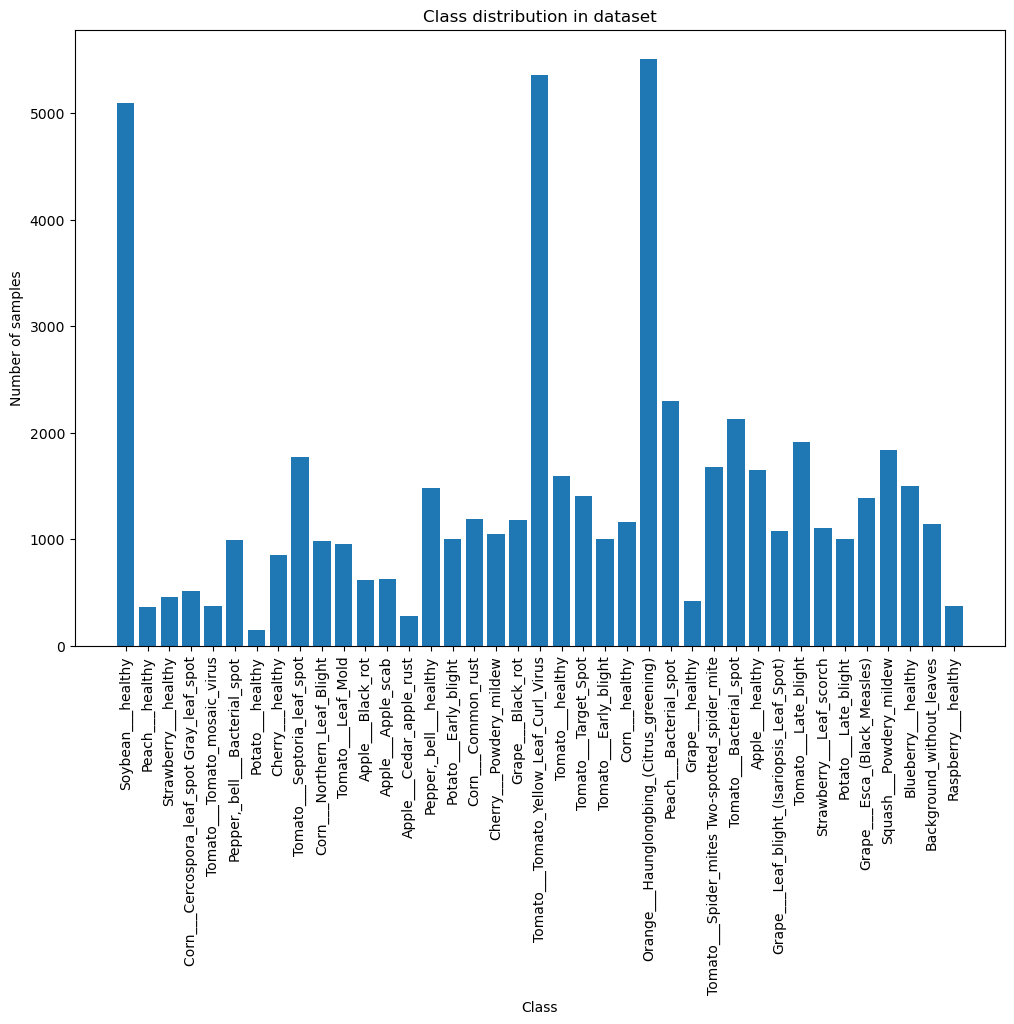

É perceptível que há muito desbalanceamento entre as classes. Contudo, esse não foi um problema observado no momento de treinamento, pois o split dos dados em conjuntos de treinamento e validação respeitou as proporções entre as classes.

### **Classes notáveis**
Neste dataset, como é o esperado, há um padrão entre suas imagens. Esse padrão pode ser observado na maior parte de suas classes. As imagens são como segue:

<div style="text-align: center;">
    <img src="imgs/standard.png" alt="standard images" style="width:400px;"/>
</div>

Contudo, algumas classes possuem um tipo de imagem diferente. Desse modo, compilamos aqui as classes cujas imagens fogem do padrão de imagens do dataset.

#### **• Sem background**

<table style="width:100%; text-align: center;">
  <tr>
    <th>Corn___Common_rust</th>
    <td><img src="imgs/odd_images/sem_background/Corn___Common_rust/image (213).JPG" alt="Image 1" style="width:100px;"></td>
    <td><img src="imgs/odd_images/sem_background/Corn___Common_rust/image (218).JPG" alt="Image 2" style="width:100px;"></td>
    <td><img src="imgs/odd_images/sem_background/Corn___Common_rust/image (220).JPG" alt="Image 3" style="width:100px;"></td>
    <td><img src="imgs/odd_images/sem_background/Corn___Common_rust/image (231).JPG" alt="Image 4" style="width:100px;"></td>
  </tr>
  <tr>
    <th>Tomato___Late_blight</th>
    <td><img src="imgs/odd_images/sem_background/Tomato___Late_blight/image (68).jpg" alt="Image 5" style="width:100px;"></td>
    <td><img src="imgs/odd_images/sem_background/Tomato___Late_blight/image (91).jpg" alt="Image 6" style="width:100px;"></td>
    <td><img src="imgs/odd_images/sem_background/Tomato___Late_blight/image (146).jpg" alt="Image 7" style="width:100px;"></td>
    <td><img src="imgs/odd_images/sem_background/Tomato___Late_blight/image (361).jpg" alt="Image 8" style="width:100px;"></td>
  </tr>
</table>


#### **• Classes com problemas de balanço de branco**

##### **- Imagens avermelhadas**
<table style="width:100%; text-align: center;">
  <tr>
    <th>Orange___Haunglongbing_(Citrus_greening)</th>
    <td><img src="imgs/odd_images/avermelhadas/Orange___Haunglongbing_(Citrus_greening)/image (7).JPG" alt="Image 1" style="width:100px;"></td>
    <td><img src="imgs/odd_images/avermelhadas/Orange___Haunglongbing_(Citrus_greening)/image (23).JPG" alt="Image 2" style="width:100px;"></td>
    <td><img src="imgs/odd_images/avermelhadas/Orange___Haunglongbing_(Citrus_greening)/image (55).JPG" alt="Image 3" style="width:100px;"></td>
    <td><img src="imgs/odd_images/avermelhadas/Orange___Haunglongbing_(Citrus_greening)/image (59).JPG" alt="Image 4" style="width:100px;"></td>
  </tr>
  <tr>
    <th>Tomato___Spider_mites Two-spotted_spider_mite</th>
    <td><img src="imgs/odd_images/avermelhadas/Tomato___Spider_mites Two-spotted_spider_mite/image (53).JPG" alt="Image 5" style="width:100px;"></td>
    <td><img src="imgs/odd_images/avermelhadas/Tomato___Spider_mites Two-spotted_spider_mite/image (27).JPG" alt="Image 6" style="width:100px;"></td>
    <td><img src="imgs/odd_images/avermelhadas/Tomato___Spider_mites Two-spotted_spider_mite/image (138).JPG" alt="Image 7" style="width:100px;"></td>
    <td><img src="imgs/odd_images/avermelhadas/Tomato___Spider_mites Two-spotted_spider_mite/image (244).JPG" alt="Image 8" style="width:100px;"></td>
  </tr>
</table>


##### **- Imagens azuladas**
<table style="width:100%; text-align: center;">
  <tr>
    <th>Cherry___Powdery_mildew</th>
    <td><img src="imgs/odd_images/azuladas/Cherry___Powdery_mildew/image (14).JPG" alt="Image 1" style="width:100px;"></td>
    <td><img src="imgs/odd_images/azuladas/Cherry___Powdery_mildew/image (172).JPG" alt="Image 2" style="width:100px;"></td>
    <td><img src="imgs/odd_images/azuladas/Cherry___Powdery_mildew/image (363).JPG" alt="Image 3" style="width:100px;"></td>
    <td><img src="imgs/odd_images/azuladas/Cherry___Powdery_mildew/image (734).JPG" alt="Image 4" style="width:100px;"></td>
  </tr>
  <tr>
    <th>Tomato___Leaf_Mold</th>
    <td><img src="imgs/odd_images/azuladas/Tomato___Leaf_Mold/image (2).JPG" alt="Image 5" style="width:100px;"></td>
    <td><img src="imgs/odd_images/azuladas/Tomato___Leaf_Mold/image (14).JPG" alt="Image 6" style="width:100px;"></td>
    <td><img src="imgs/odd_images/azuladas/Tomato___Leaf_Mold/image (151).JPG"" alt="Image 7" style="width:100px;"></td>
    <td><img src="imgs/odd_images/azuladas/Tomato___Leaf_Mold/image (271).JPG"" alt="Image 8" style="width:100px;"></td>
  </tr>
</table>

#### **• Classes com problemas de exposição**

##### **- Super-exposição**
<table style="width:100%; text-align: center;">
  <tr>
    <th>Apple___Apple_scab</th>
    <td><img src="imgs/odd_images/super_exposição/Apple___Apple_scab/image (42).JPG" alt="Image 1" style="width:100px;"></td>
    <td><img src="imgs/odd_images/super_exposição/Apple___Apple_scab/image (90).JPG"alt="Image 2" style="width:100px;"></td>
    <td><img src="imgs/odd_images/super_exposição/Apple___Apple_scab/image (408).JPG"alt="Image 3" style="width:100px;"></td>
    <td><img src="imgs/odd_images/super_exposição/Apple___Apple_scab/image (588).JPG"alt="Image 4" style="width:100px;"></td>
  </tr>
  <tr>
    <th>Apple___healthy</th>
    <td><img src="imgs/odd_images/super_exposição/Apple___healthy/image (12).JPG" alt="Image 5" style="width:100px;"></td>
    <td><img src="imgs/odd_images/super_exposição/Apple___healthy/image (76).JPG" alt="Image 6" style="width:100px;"></td>
    <td><img src="imgs/odd_images/super_exposição/Apple___healthy/image (307).JPG" alt="Image 7" style="width:100px;"></td>
    <td><img src="imgs/odd_images/super_exposição/Apple___healthy/image (952).JPG" alt="Image 8" style="width:100px;"></td>
  </tr>
  <tr>
    <th>Blueberry___healthy</th>
    <td><img src="imgs/odd_images/super_exposição/Blueberry___healthy/image (14).JPG" alt="Image 5" style="width:100px;"></td>
    <td><img src="imgs/odd_images/super_exposição/Blueberry___healthy/image (32).JPG" alt="Image 6" style="width:100px;"></td>
    <td><img src="imgs/odd_images/super_exposição/Blueberry___healthy/image (186).JPG" alt="Image 7" style="width:100px;"></td>
    <td><img src="imgs/odd_images/super_exposição/Blueberry___healthy/image (779).JPG" alt="Image 8" style="width:100px;"></td>
  </tr>
  <tr>
    <th>Grape___Black_rot</th>
    <td><img src="imgs/odd_images/super_exposição/Grape___Black_rot/image (80).JPG" alt="Image 5" style="width:100px;"></td>
    <td><img src="imgs/odd_images/super_exposição/Grape___Black_rot/image (201).JPG" alt="Image 6" style="width:100px;"></td>
    <td><img src="imgs/odd_images/super_exposição/Grape___Black_rot/image (515).JPG" alt="Image 7" style="width:100px;"></td>
    <td><img src="imgs/odd_images/super_exposição/Grape___Black_rot/image (672).JPG" alt="Image 8" style="width:100px;"></td>
  </tr>
  <tr>
    <th>Grape___Esca_(Black_Measles)</th>
    <td><img src="imgs/odd_images/super_exposição/Grape___Esca_(Black_Measles)/image (80).JPG" alt="Image 5" style="width:100px;"></td>
    <td><img src="imgs/odd_images/super_exposição/Grape___Esca_(Black_Measles)/image (246).JPG" alt="Image 6" style="width:100px;"></td>
    <td><img src="imgs/odd_images/super_exposição/Grape___Esca_(Black_Measles)/image (672).JPG" alt="Image 7" style="width:100px;"></td>
    <td><img src="imgs/odd_images/super_exposição/Grape___Esca_(Black_Measles)/image (1039).JPG" alt="Image 8" style="width:100px;"></td>
  </tr>
</table>

##### **- Sub-exposição**
<table style="width:100%; text-align: center;">
  <tr>
    <th>Tomato___Late_blight</th>
    <td><img src="imgs/odd_images/sub_exposição/Tomato___Late_blight/image (44).JPG" alt="Image 1" style="width:100px;"></td>
    <td><img src="imgs/odd_images/sub_exposição/Tomato___Late_blight/image (64).JPG" alt="Image 2" style="width:100px;"></td>
    <td><img src="imgs/odd_images/sub_exposição/Tomato___Late_blight/image (1384).jpg" alt="Image 3" style="width:100px;"></td>
    <td><img src="imgs/odd_images/sub_exposição/Tomato___Late_blight/image (1013).JPG" alt="Image 4" style="width:100px;"></td>
  </tr>
</table>

#### **• Classes com problemas de enquadramento**
<table style="width:100%; text-align: center;">
  <tr>
    <th>Corn___Cercospora_leaf_spot Gray_leaf_spot</th>
    <td><img src="imgs/odd_images/enquadramento/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (6).JPG" alt="Image 1" style="width:100px;"></td>
    <td><img src="imgs/odd_images/enquadramento/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (13).JPG" alt="Image 2" style="width:100px;"></td>
    <td><img src="imgs/odd_images/enquadramento/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (19).JPG" alt="Image 3" style="width:100px;"></td>
    <td><img src="imgs/odd_images/enquadramento/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (487).JPG" alt="Image 4" style="width:100px;"></td>
  </tr>
  <tr>
    <th>Corn___healthy</th>
    <td><img src="imgs/odd_images/enquadramento/Corn___healthy/image (224).jpg" alt="Image 5" style="width:100px;"></td>
    <td><img src="imgs/odd_images/enquadramento/Corn___healthy/image (230).jpg" alt="Image 6" style="width:100px;"></td>
    <td><img src="imgs/odd_images/enquadramento/Corn___healthy/image (302).jpg" alt="Image 7" style="width:100px;"></td>
    <td><img src="imgs/odd_images/enquadramento/Corn___healthy/image (330).jpg" alt="Image 8" style="width:100px;"></td>
  </tr>
  <tr>
    <th>Corn___Northern_Leaf_Blight</th>
    <td><img src="imgs/odd_images/enquadramento/Corn___Northern_Leaf_Blight/image (106).JPG" alt="Image 5" style="width:100px;"></td>
    <td><img src="imgs/odd_images/enquadramento/Corn___Northern_Leaf_Blight/image (113).JPG" alt="Image 6" style="width:100px;"></td>
    <td><img src="imgs/odd_images/enquadramento/Corn___Northern_Leaf_Blight/image (130).JPG" alt="Image 7" style="width:100px;"></td>
    <td><img src="imgs/odd_images/enquadramento/Corn___Northern_Leaf_Blight/image (146).JPG" alt="Image 8" style="width:100px;"></td>
  </tr>
  <tr>
    <th>Squash___Powdery_mildew</th>
    <td><img src="imgs/odd_images/enquadramento/Squash___Powdery_mildew/image (94).JPG" alt="Image 5" style="width:100px;"></td>
    <td><img src="imgs/odd_images/enquadramento/Squash___Powdery_mildew/image (330).JPG" alt="Image 6" style="width:100px;"></td>
    <td><img src="imgs/odd_images/enquadramento/Squash___Powdery_mildew/image (1034).JPG" alt="Image 7" style="width:100px;"></td>
    <td><img src="imgs/odd_images/enquadramento/Squash___Powdery_mildew/image (101).JPG" alt="Image 8" style="width:100px;"></td>
  </tr>
  <tr>
    <th>Strawberry___Leaf_scorch</th>
    <td><img src="imgs/odd_images/enquadramento/Strawberry___Leaf_scorch/image (122).JPG" alt="Image 5" style="width:100px;"></td>
    <td><img src="imgs/odd_images/enquadramento/Strawberry___Leaf_scorch/image (19).JPG" alt="Image 6" style="width:100px;"></td>
    <td><img src="imgs/odd_images/enquadramento/Strawberry___Leaf_scorch/image (183).JPG" alt="Image 7" style="width:100px;"></td>
    <td><img src="imgs/odd_images/enquadramento/Strawberry___Leaf_scorch/image (347).JPG" alt="Image 8" style="width:100px;"></td>
  </tr>
</table>

#### **• Classes com problemas de sombras**
<table style="width:100%; text-align: center;">
  <tr>
    <th>Peach___healthy</th>
    <td><img src="imgs/odd_images/sombras/Peach___healthy/image (4).JPG" alt="Image 1" style="width:100px;"></td>
    <td><img src="imgs/odd_images/sombras/Peach___healthy/image (72).JPG" alt="Image 2" style="width:100px;"></td>
    <td><img src="imgs/odd_images/sombras/Peach___healthy/image (146).JPG" alt="Image 3" style="width:100px;"></td>
    <td><img src="imgs/odd_images/sombras/Peach___healthy/image (338).JPG" alt="Image 4" style="width:100px;"></td>
  </tr>
  <tr>
    <th>Pepper,_bell___Bacterial_spot</th>
    <td><img src="imgs/odd_images/sombras/Pepper,_bell___Bacterial_spot/image (6).JPG" alt="Image 5" style="width:100px;"></td>
    <td><img src="imgs/odd_images/sombras/Pepper,_bell___Bacterial_spot/image (15).JPG" alt="Image 6" style="width:100px;"></td>
    <td><img src="imgs/odd_images/sombras/Pepper,_bell___Bacterial_spot/image (299).JPG" alt="Image 7" style="width:100px;"></td>
    <td><img src="imgs/odd_images/sombras/Pepper,_bell___Bacterial_spot/image (547).JPG" alt="Image 8" style="width:100px;"></td>
  </tr>
  <tr>
    <th>Tomato___healthy</th>
    <td><img src="imgs/odd_images/sombras/Tomato___healthy/image (1308).JPG" alt="Image 5" style="width:100px;"></td>
    <td><img src="imgs/odd_images/sombras/Tomato___healthy/image (322).JPG" alt="Image 6" style="width:100px;"></td>
    <td><img src="imgs/odd_images/sombras/Tomato___healthy/image (1070).JPG" alt="Image 7" style="width:100px;"></td>
    <td><img src="imgs/odd_images/sombras/Tomato___healthy/image (1301).JPG" alt="Image 8" style="width:100px;"></td>
  </tr>
  <tr>
    <th>Tomato___Target_Spot</th>
    <td><img src="imgs/odd_images/sombras/Tomato___Target_Spot/image (266).JPG" alt="Image 5" style="width:100px;"></td>
    <td><img src="imgs/odd_images/sombras/Tomato___Target_Spot/image (325).JPG" alt="Image 6" style="width:100px;"></td>
    <td><img src="imgs/odd_images/sombras/Tomato___Target_Spot/image (432).JPG" alt="Image 7" style="width:100px;"></td>
    <td><img src="imgs/odd_images/sombras/Tomato___Target_Spot/image (581).JPG" alt="Image 8" style="width:100px;"></td>
  </tr>
</table>

#### **• Background without leaves**
<table style="width:100%; text-align: center;">
  <tr>
    <th>background_without_leaves</th>
    <td><img src="imgs/odd_images/background_without_leaves/image (1).jpg" alt="Image 1" style="width:100px;"></td>
    <td><img src="imgs/odd_images/background_without_leaves/image (11).jpg" alt="Image 2" style="width:100px;"></td>
    <td><img src="imgs/odd_images/background_without_leaves/image (14).jpg" alt="Image 3" style="width:100px;"></td>
    <td><img src="imgs/odd_images/background_without_leaves/image (43).jpg" alt="Image 4" style="width:100px;"></td>
  </tr>
</table>

## **Desempenho de classificador treinado com o dataset padrão:**
Quando chegou o momento de treinar um modelo classificador, escolhemos a rede VGG16 e o que notamos foi que, após poucas épocas, a performance do modelo alcançou níveis excelentes e, o que deveria ser um problema difícil de se resolver, se tornou trivial.

Gráficos de acurácia e valorda função de perda:

**Gráfico da acurácia ao longo das épocas:**
<div style="text-align: center;">
    <img src="imgs/regular_model_results/accuracy.png" alt="Acc plot" style="width:600px;"/>
</div>

**Gráfico do valor da função de perda ao longo das épocas:**
<div style="text-align: center;">
    <img src="imgs/regular_model_results/loss.png" alt="Loss plot" style="width:600px;"/>
</div>

**Matriz de confusão:**
<div style="text-align: center;">
    <img src="imgs/regular_model_results/confusion.png" alt="Confusion Matrix"/>
</div>

**Estatísticas por classe para o modelo treinado com o dataset padrão:**

| Class                                         | Precision | Recall | F1-Score | Support |
|-----------------------------------------------|-----------|--------|----------|---------|
| Apple___Apple_scab                            | 0.97      | 0.94   | 0.96     | 136     |
| Apple___Black_rot                             | 0.97      | 0.96   | 0.97     | 116     |
| Apple___Cedar_apple_rust                      | 0.98      | 1.00   | 0.99     | 62      |
| Apple___healthy                               | 0.94      | 0.97   | 0.95     | 336     |
| Background_without_leaves                     | 0.90      | 0.98   | 0.93     | 241     |
| Blueberry___healthy                           | 0.98      | 0.99   | 0.98     | 294     |
| Cherry___Powdery_mildew                       | 0.97      | 0.99   | 0.98     | 209     |
| Cherry___healthy                              | 0.98      | 0.99   | 0.99     | 172     |
| Corn___Cercospora_leaf_spot Gray_leaf_spot    | 0.83      | 0.89   | 0.86     | 99      |
| Corn___Common_rust                            | 0.95      | 0.99   | 0.97     | 258     |
| Corn___Northern_Leaf_Blight                   | 0.96      | 0.86   | 0.91     | 214     |
| Corn___healthy                                | 0.98      | 1.00   | 0.99     | 234     |
| Grape___Black_rot                             | 0.97      | 0.98   | 0.98     | 231     |
| Grape___Esca_(Black_Measles)                  | 0.99      | 0.98   | 0.98     | 282     |
| Grape___Leaf_blight_(Isariopsis_Leaf_Spot)    | 0.99      | 0.98   | 0.98     | 208     |
| Grape___healthy                               | 0.98      | 0.96   | 0.97     | 84      |
| Orange___Haunglongbing_(Citrus_greening)      | 0.99      | 0.99   | 0.99     | 1076    |
| Peach___Bacterial_spot                        | 0.96      | 0.97   | 0.96     | 454     |
| Peach___healthy                               | 0.84      | 1.00   | 0.92     | 70      |
| Pepper,_bell___Bacterial_spot                 | 0.99      | 0.95   | 0.97     | 212     |
| Pepper,_bell___healthy                        | 0.98      | 0.97   | 0.97     | 293     |
| Potato___Early_blight                         | 1.00      | 0.97   | 0.98     | 209     |
| Potato___Late_blight                          | 0.96      | 0.92   | 0.94     | 221     |
| Potato___healthy                              | 0.90      | 0.93   | 0.92     | 30      |
| Raspberry___healthy                           | 0.99      | 0.99   | 0.99     | 84      |
| Soybean___healthy                             | 0.99      | 0.98   | 0.99     | 997     |
| Squash___Powdery_mildew                       | 0.99      | 0.99   | 0.99     | 384     |
| Strawberry___Leaf_scorch                      | 0.99      | 0.98   | 0.98     | 251     |
| Strawberry___healthy                          | 1.00      | 1.00   | 1.00     | 100     |
| Tomato___Bacterial_spot                       | 0.98      | 0.95   | 0.96     | 408     |
| Tomato___Early_blight                         | 0.97      | 0.80   | 0.88     | 181     |
| Tomato___Late_blight                          | 0.94      | 0.93   | 0.93     | 366     |
| Tomato___Leaf_Mold                            | 0.97      | 0.93   | 0.95     | 187     |
| Tomato___Septoria_leaf_spot                   | 0.96      | 0.96   | 0.96     | 343     |
| Tomato___Spider_mites Two-spotted_spider_mite | 0.95      | 0.98   | 0.96     | 322     |
| Tomato___Target_Spot                          | 0.95      | 0.96   | 0.95     | 248     |
| Tomato___Tomato_Yellow_Leaf_Curl_Virus        | 0.98      | 0.99   | 0.99     | 1082    |
| Tomato___Tomato_mosaic_virus                  | 0.90      | 0.97   | 0.94     | 67      |
| Tomato___healthy                              | 0.96      | 1.00   | 0.98     | 329     |
| **##################################**        | **######**|**######** | **######**   | **######**  |
| **accuracy**                                  |           |        | **0.97** |**11090**|
| **macro avg**                                 | **0.96**  |**0.96**| **0.96** |**11090**|
| **weighted avg**                              | **0.97**  |**0.97**| **0.97** |**11090**|

## **Suspeita de viés**
Como a performance do modelo foi boa demais, passamos a considerar a possibilidade de que algumas features no dataset estariam facilitando a classificação. Isto é, as imagens de algumas classes estariam se diferenciando das imagens das outras classes devido à features que não deveriam ser relevantes no processo de classificação.
### **Referências sobre viés nesse dataset:**
#### **• Using Deep Learning for Image-Based Plant Disease Detection**
Esse artigo é de setembro de 2016, dos autores Sharada P. Mohanty, David P. Hughes e Marcel Salathé. David P. Hughes e Marcel Salathé participaram da construção do dataset em questão. Nesse artigo, os autores exploram as possiblidades de uso de técnicas de Machine Learning aplicadas ao dataset produzido. Nesse sentido, é possível observar a preocupação dos autores que os modelos utilizados "aprendessem" somente os vieses presentes no dataset no lugar de aprender os padrões realmente importantes para fazer identifcar cada classe no dataset. Para isso, eles realizaram experimentos em 3 versões do dataset:
1. Dataset regular;
2. Dataset segmentado (somente as imagens das folhas --- sem o background);
3. Dataset em grayscale.

> Across all our experiments, we use three different versions of the whole PlantVillage dataset. We start with the PlantVillage dataset as it is, in color; then we experiment with a gray-scaled version of the PlantVillage dataset, and finally **we run all the experiments on a version of the PlantVillage dataset where the leaves were segmented, hence removing all the extra background information which might have the potential to introduce some inherent bias in the dataset** due to the regularized process of data collection in case of PlantVillage dataset. Segmentation was automated by the means of a script tuned to perform well on our particular dataset. We chose a technique based on a set of masks generated by analysis of the color, lightness and saturation components of different parts of the images in several color spaces (Lab and HSB). **One of the steps of that processing also allowed us to easily fix color casts, which happened to be very strong in some of the subsets of the dataset, thus removing another potential bias**. **This set of experiments was designed to understand if the neural network actually learns the “notion” of plant diseases, or if it is just learning the inherent biases in the dataset. Figure 2 shows the different versions of the same leaf for a randomly selected set of leaves.**

Os resultados obtidos pelos autores, mesmo tendo aplicado todas essas técnicas de processamento de imagens continuou sendo muito bom. O melhor desempenho obtido seguiu o seguinte setup: 
- 99.34% (GoogLeNet::TransferLearning::Color::80–20)

E o pior resultado foi:

- 85.53% (AlexNet::TrainingFromScratch::GrayScale::80–20)

Continuando os experimentos realizados nesse artigo, os autores decidiram verificar se o modelo generalizaria para dados que não respeitassem os padrões de captura de imagem presentes no dataset. Para isso, eles construíram pequenos datasets com imagens obtidas na internet.
- 121 (dataset 1)
- 119 images (dataset 2)

> Using the best model on these datasets, we obtained an overall accuracy of 31.40% in dataset 1, and 31.69% in dataset 2, in successfully predicting the correct class label (i.e., crop and disease information) from among 38 possible class labels.

Com certeza, a performance obtida é melhor do que uma escolha aleatória (que alcançaria uma acurácia de 2.63%), contudo, essa queda de performance deixa claro que as condições de captura e treinamento do modelo deixaram muito a desejar. É interessante perceber que não faria sentido testar os outros modelos nesses novos datasets construidos pois as imagens dos novos datasets (de teste) não apresentariam a mesma característica das imagens dos datasets que foram utilizados para treinar os outros modelos (segmentadas e grayscale). Ainda, vale comentar que o artfício de usar imagens grayscale é ruim pois certamente remove características relevantes para a identificação de doenças nas folhas das plantas como: amarelamento de folhas, cores das lesões, etc.

Uma abordagem mais interessante seria produzir um modelo que, mesmo com performance mais pobre no conjunto de treinamento/validação generalizasse melhor para dados fora dos padrões do dataset original. Isso poderia ser alcançado via correção de balanço de branco e exposição e constituiria um bom argumento para dizer que essas features se correlacionam espuriamente com as classes do dataset original.


#### **• Caso do PlantVillage 8px**
O artigo Uncovering bias in the PlantVillage dataset de Mehmet Alican Noyan, publicado em junho de 2022 se propõe a evidenciar o viés no dataset PlantVillage (o que estamos estudando). O autor faz uma consideração muito importante sobre o dataset:

> Mohanty et al.[15] realized that the convolution neural network they developed using the PlantVillage dataset experienced a significant drop in accuracy from 99% to 31% when tested on other online datasets. They claimed that increasing the number and variability of the dataset would be sufficient to overcome this problem. **However, it is also possible that such a vast drop indicates an inherent dataset bias issue. If this is the case, collecting more data will not improve performance.**

Então, o autor tenta provar que existe um viés muito forte e inerente ao dataset. Para fazer isso, a ideia é simples, mas muito audaciosa: separar 8 pixels de cada imagem do dataset e formar uma nova imagem que seria constituida de puro ruído. Depois disso, treinar um modelo classificador nesse novo dataset e observar se o modelo é capaz de identificar padrões que possibilitem a classificação. Evidenciando, assim, o viés.

<div style="text-align: center;">
    <img src="imgs/8px_image.png" alt="8px img" style="width:600px;"/>
</div>

Isso foi feito e o autor obteve uma acurácia de 49% no conjunto de treinamento, quando, deveria ser cerca de 2.6% (escolha aleatória). 

Para verificar esses resultados, nós repetimos os passos do autor e, de fato, obtivemos um valor alto de acurácia: 33%. Contudo, ao observar as estatísticas para cada classe, percebemos que, na verdade, o classificador utilizado só obteve sua alta acurácia devido ao desbalanceamento entre as classes. Observe as estatísticas por classe para esse experimento:


| Class                                         | Precision | Recall | F1-Score | Support |
|-----------------------------------------------|-----------|--------|----------|---------|
| Apple___Apple_scab                            | 0.18      | 0.06   | 0.09     | 130     |
| Apple___Black_rot                             | 0.07      | 0.03   | 0.04     | 116     |
| Apple___Cedar_apple_rust                      | 0.27      | 0.06   | 0.10     | 69      |
| Apple___healthy                               | 0.19      | 0.12   | 0.15     | 329     |
| Background_without_leaves                     | 0.60      | 0.63   | 0.61     | 225     |
| Blueberry___healthy                           | 0.31      | 0.25   | 0.28     | 305     |
| Cherry___Powdery_mildew                       | 0.25      | 0.20   | 0.22     | 212     |
| Cherry___healthy                              | 0.19      | 0.11   | 0.14     | 190     |
| Corn___Cercospora_leaf_spot Gray_leaf_spot    | 0.21      | 0.06   | 0.09     | 99      |
| Corn___Common_rust                            | 0.97      | 0.98   | 0.98     | 251     |
| Corn___Northern_Leaf_Blight                   | 0.32      | 0.27   | 0.30     | 214     |
| Corn___healthy                                | 0.35      | 0.24   | 0.29     | 238     |
| Grape___Black_rot                             | 0.14      | 0.10   | 0.12     | 243     |
| Grape___Esca_(Black_Measles)                  | 0.25      | 0.25   | 0.25     | 287     |
| Grape___Leaf_blight_(Isariopsis_Leaf_Spot)    | 0.21      | 0.15   | 0.17     | 208     |
| Grape___healthy                               | 0.15      | 0.03   | 0.05     | 73      |
| Orange___Haunglongbing_(Citrus_greening)      | 0.46      | 0.61   | 0.53     | 1117    |
| Peach___Bacterial_spot                        | 0.23      | 0.26   | 0.25     | 458     |
| Peach___healthy                               | 0.16      | 0.09   | 0.12     | 76      |
| Pepper,_bell___Bacterial_spot                 | 0.20      | 0.16   | 0.18     | 201     |
| Pepper,_bell___healthy                        | 0.16      | 0.09   | 0.12     | 283     |
| Potato___Early_blight                         | 0.30      | 0.27   | 0.28     | 193     |
| Potato___Late_blight                          | 0.15      | 0.08   | 0.11     | 181     |
| Potato___healthy                              | 0.00      | 0.00   | 0.00     | 24      |
| Raspberry___healthy                           | 0.00      | 0.00   | 0.00     | 81      |
| Soybean___healthy                             | 0.41      | 0.72   | 0.53     | 1016    |
| Squash___Powdery_mildew                       | 0.35      | 0.28   | 0.31     | 366     |
| Strawberry___Leaf_scorch                      | 0.17      | 0.13   | 0.14     | 215     |
| Strawberry___healthy                          | 0.11      | 0.02   | 0.04     | 96      |
| Tomato___Bacterial_spot                       | 0.32      | 0.32   | 0.32     | 437     |
| Tomato___Early_blight                         | 0.14      | 0.04   | 0.07     | 187     |
| Tomato___Late_blight                          | 0.46      | 0.29   | 0.36     | 404     |
| Tomato___Leaf_Mold                            | 0.13      | 0.05   | 0.07     | 179     |
| Tomato___Septoria_leaf_spot                   | 0.14      | 0.07   | 0.10     | 348     |
| Tomato___Spider_mites Two-spotted_spider_mite | 0.24      | 0.31   | 0.27     | 342     |
| Tomato___Target_Spot                          | 0.17      | 0.13   | 0.15     | 280     |
| Tomato___Tomato_Yellow_Leaf_Curl_Virus        | 0.24      | 0.46   | 0.32     | 1024    |
| Tomato___Tomato_mosaic_virus                  | 0.00      | 0.00   | 0.00     | 69      |
| Tomato___healthy                              | 0.32      | 0.23   | 0.27     | 324     |
| **##################################**        | **######**|**######** | **######**   | **######**  |
| **accuracy**                                  |           |        | **0.33** |**11074**|
| **macro avg**                                 | **0.24**  |**0.21**| **0.21** |**11074**|
| **weighted avg**                              | **0.30**  |**0.33**| **0.30** |**11074**|

## **Tentando explicar o viés**

### **Plot t-SNE**
Uma ideia que tivemos foi exibir os dados na maneira com a qual a rede convolucional estava os separando a fim de classificá-los. Para isso, utilizamos um plot t-SNE das camadas finais da rede.
O plot t-SNE é o seguinte:

<div style="text-align: center;">
    <img src="imgs/batch_0001_.png" alt="t-SNE plot" style="width:1000px;"/>
</div>

#### **Enxergando clusters com características estranhas**
Ao observar a maneira como a rede estava separando os dados, é possível notar claramente que há clusters marcados por algumas das características estranhas que comentamos no início desse documento. Principalmente, conseguimos identificar clusters com as seguintes características:
- Problemas com balanço de branco:
    - Imagens avermelhadas
    - Imagens azuladas
- Problemas com exposição:
    - Imagens super expostas
    - Imagens sub expostas

#### **"Corrigindo" essas características**
Ao se deparar com esses discrepâncias nas imagens é intuitivo pensar em maneiras de como corrigir essas características. Nesse sentido, há métodos de correção de balanço de branco e exposição que não demandam tant esforço:

##### **<span style="margin-left: 100px;"></span>• Balanço de branco <span style="margin-left: 530px;"></span>• Exposição**
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Side by Side Images with CSS</title>
    <style>
        .container {
            display: flex; /* Uses flexbox layout to align children side by side */
            justify-content: center; /* Center horizontally */
            align-items: center; /* Center vertically */
        }
        .image {
            margin: 5px; /* Adds space between the images */
        }
    </style>
</head>
<body>
    <div class="container">
        <div class="image">
            <img src="imgs/wb.png" alt="First Image" style="width:400px;"/>
        </div>
        <div class="image">
            <img src="imgs/exposure.png" alt="Second Image" style="width:400px;"/>
        </div>
    </div>
</body>
</html>

### **Histogramas das imagens**
Além disso, uma ideia foi analisar os histogramas das imagens para saber se há características relativas à distribuição de cores que facilitem a classificação. Isso é fácil de se imaginar se lembrarmos das imagens que fogem do padrão que foram mostradas no início desse documento. Se há uma quantidade considerável de imagens avermelhadas em uma mesma classe, evidentemente esse desbalancemaneto de cor irá ser levado em consideração para classificar uma imagem como pertencendo à essa classe.

#### **• Histograma médio de cada classe**
Uma primeira ideia que tivemos foi plotar o histograma médio por classe. Com esse plot, já é possível identificar diferenças muito interessantes dos histogramas em diferentes classes. Mas perceba que somente a informação "enviesada" da distribuição de cores não é o suficiente para se construir o que chamamos de feature enviesada. Isso por que uma determinada distribuição de cores pode fazer parte do sinal procurado em uma classe. Por exemplo uma folha amarelada.

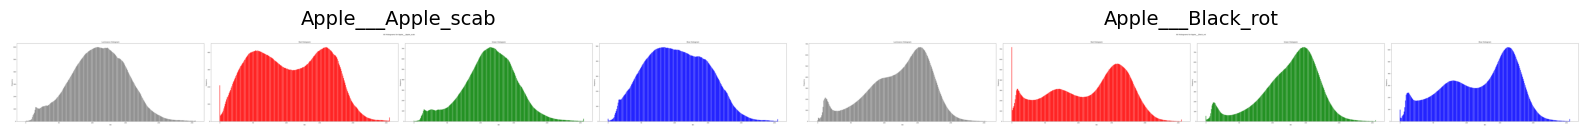

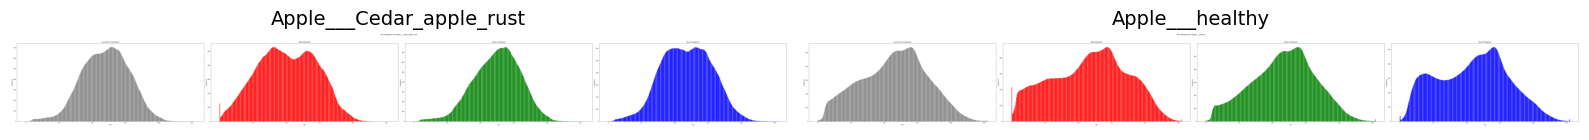

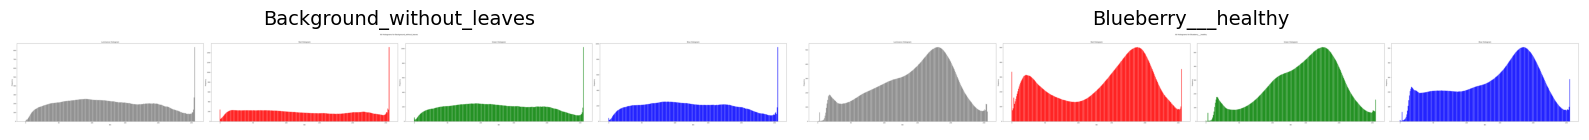

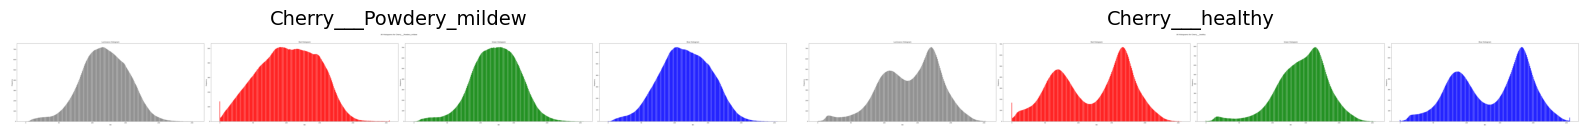

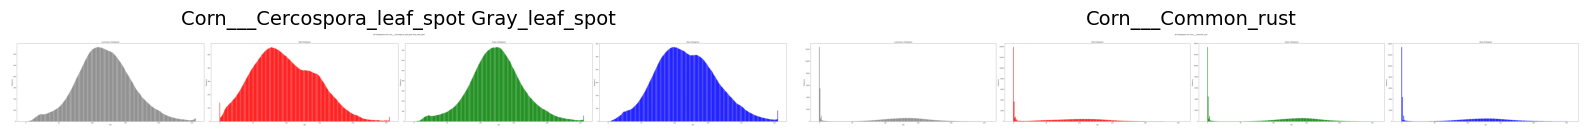

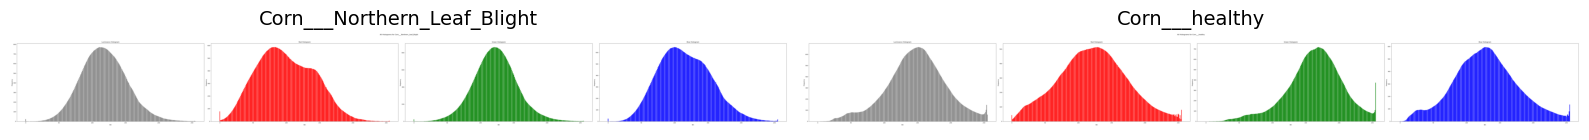

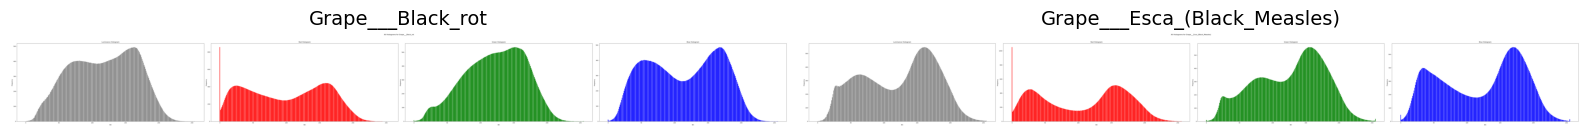

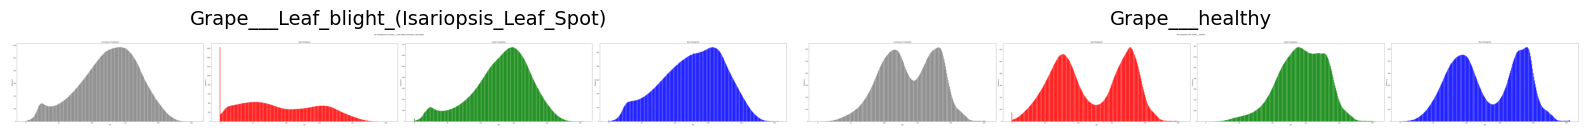

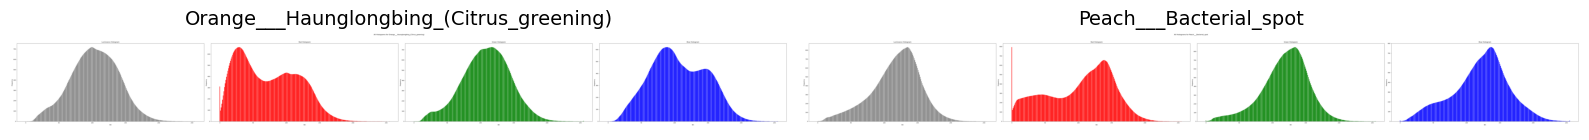

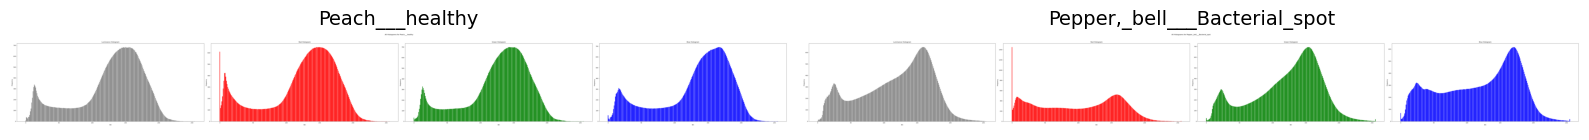

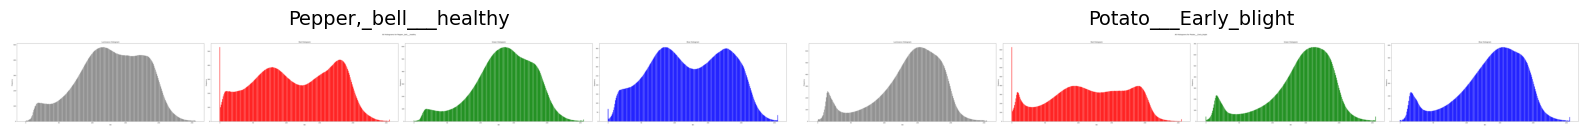

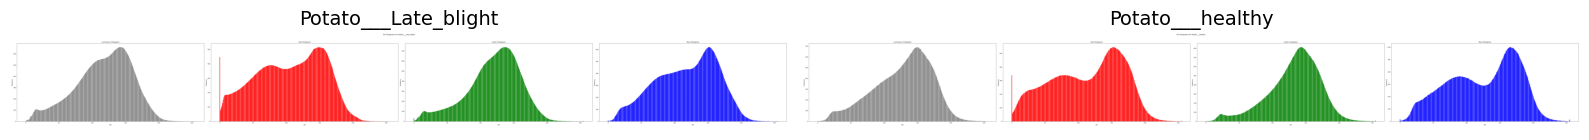

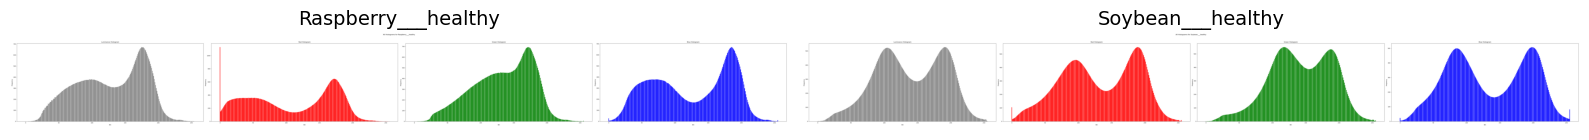

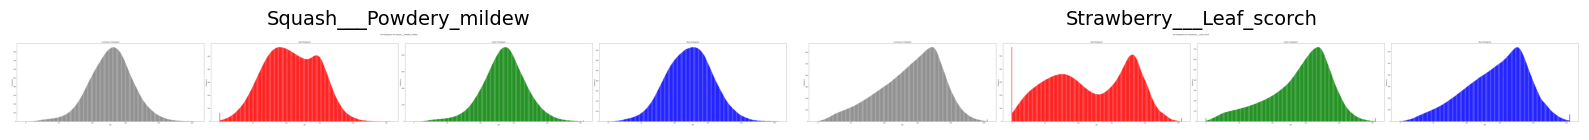

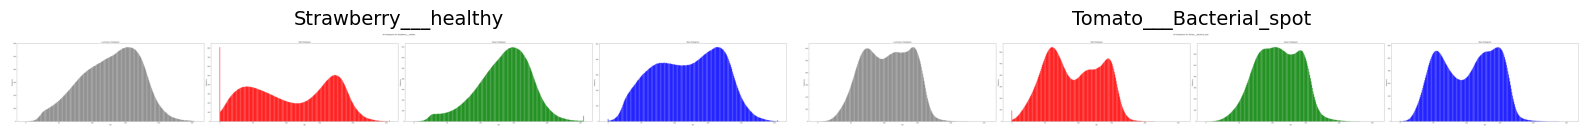

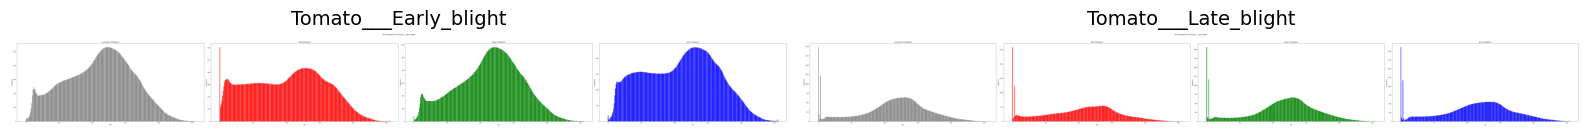

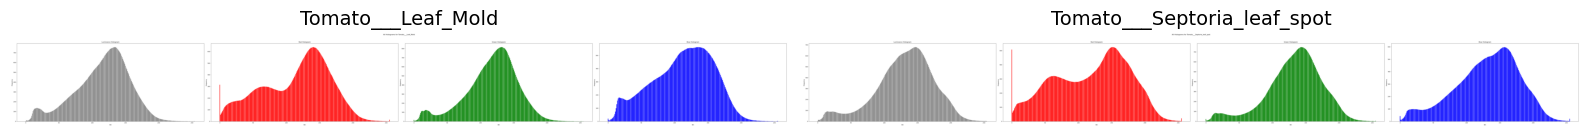

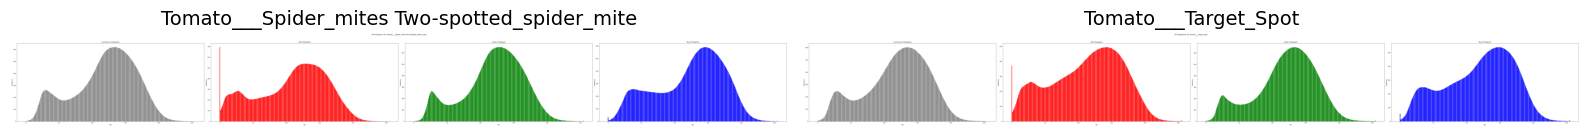

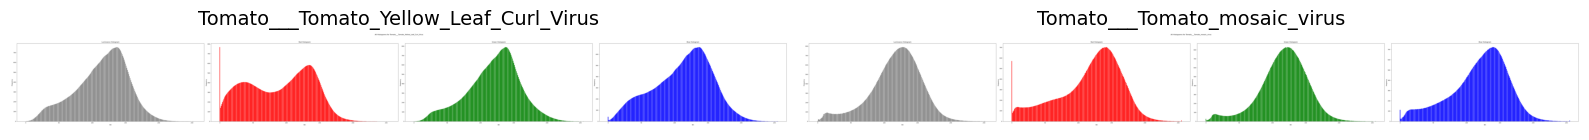

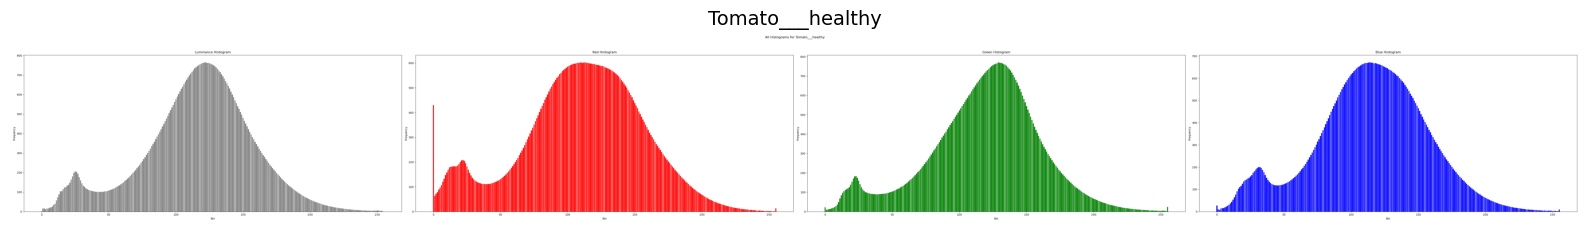

In [2]:
import matplotlib.pyplot as plt
import os
imgs_dir = "imgs/mean_histograms"
files = [f for f in os.listdir(imgs_dir) if f.endswith('.png')]
files.sort()
fig_width, fig_height = 16, 6
for i in range(0, len(files), 2):
    remaining_images = min(2, len(files) - i)
    fig, axs = plt.subplots(1, remaining_images, figsize=(fig_width, fig_height))
    axs = axs.flatten() if remaining_images > 1 else [axs]
    for j in range(remaining_images):
        file = files[i + j]
        img_path = os.path.join(imgs_dir, file)
        img = plt.imread(img_path)
        axs[j].imshow(img)
        axs[j].axis('off')
        class_name = file.split('.')[0]
        axs[j].set_title(class_name, fontsize=14)

    plt.tight_layout()
    plt.show()

## **Próximos passos**
### **Descobrir se essas características de fato possuem uma relação espúria com o output do classificador**
Como já foi demonstrado pelos autores do artigo e mesmo por terceiros, como o autor do PlantVillage8px, é consenso que há vieses presentes nesse conjunto de dados. Contudo, é difícil de provar isso e de identificar tais vieses. Aqui, temos listadas algumas possibilidades que podemos explorar para tentar realizar tal feito.

### **1. Tentando extrair informação dos histogramas**
Como já foi comentado, pensamos que os histogramas das imagens poderiam nos dar informações sobre possíveis vieses nesse dataset. Continuando esse raciocínio, podemos utilizar as informações presentes nos histogramas para investigar vieses de iluminação e distribuição de cor. Nesse sentido, produzimos datasets que nos permitam avaliar essa hipótese.
- **Dataset dos histogramas**
- **Dataset das estatísticas dos histogramas**
#### **1.3. Aprendizado não supervisionado**
Uma ideia para utilzar os histogramas das imagens para encontrar relações espúrias de features com o output do modelo classificador é usar algorítimos de clustering que irão agrupar esses dados de acordo com suas semelhanças. 

Depois disso, checamos se há correlação entre os clusters e o output do modelo, isto é, com as classes. 

Então, podemos plotar as imagens de acordo com seus posicionamentos nos clusters de histogramas e observar se algumas características como a iluminação ou o balanço de branco contituem-se como clusters. 

Dessa maneira, saberemos que não é o sinal da imagem (refletido no histograma e agrupado em um cluster) que estaria se correlacionando com o output do modelo, mas sim uma feature enviesada como a "vemelhidão" de uma imagem, por exemplo.

### **2. Observando diferenças no comportamento do modelo padrão ao se deparar com imagens processadas e imagens padrão**
Uma outra maneira de argumentar que o dataset está enviesado (que há um viés inerente ao dataset) consiste em seguir os seguintes passos:
1. Treinar um modelo com o dataset original (em tese o modelo "aprenderá" sobre os vieses do dataset);
2. Escolher imagens que claramente destoem de qualquer padrão correto do que se espera em uma imagem. Como a imagem a seguir:
<div style="text-align: center;">
    <img src="imgs/odd_images/super_exposição/Blueberry___healthy/image (779).JPG" alt="t-SNE plot" style="width:200px;"/>
</div>

3. Corrigir os problemas dessa imagem.Tornando a mais adequada à realidade. (Nesse caso corrigindo a exposição);
4. Analisar o comportamento do modelo ao se deparar com a imagem original (ruim) e com a imagem corrigida (boa). Algumas possibilidades:
    - Analisar a mudança nas probabilidades preditas para cada classe;
    - Analisar as diferenças do comportamento do modelo dado as duas imagens utilizando ferramentas de explicabilidade como GradCam.
     

### **3. Treinando modelos com datasets processados**
Uma outra possibilidade é treinar novos modelos a partir dos dados corrigidos do dataset original. No momento, consideramos as seguintes alterações:
1. Remoção de background;
2. Correção de balanço de branco;
3. Correção de exposição.

Perceba que essas três possibilidades de alteração nos entrega uma quantidade de processamentos equivalente à 15, então, devemos pensar cuidadosamente quais alterações iremos utilizar, em que ordem e porquê.
#### **3.1. Analisando diferenças de comportamento entre modelos**
Depois de obter novas (processadas) versões do dataset, podemos efetuar comparações entre um modelo treinado em um dos novos datasets e o modelo treinado com o dataset original. Como já observado por  Sharada P. Mohanty, David P. Hughes e Marcel Salathé, isso provavelmente irá fazer com que a performance decaia (já verificamos tal comportamento em testes preliminares). Desse modo, pode-se analizar diferenças no comportamento desses modelos. Podemos pensar, novamente em:
- Analisar a mudança nas probabilidades preditas para cada classe;
- Analisar as diferenças do comportamento do modelo dado as duas imagens utilizando ferramentas de explicabilidade como GradCam.

Por exemplo.
#### **3.2. Reproduzindo os experimentos de Sharada P. Mohanty, David P. Hughes e Marcel Salathé com modelos treinados com datasets processados.**
Em um dado momento em que tenhamos um novo dataset o qual consideramos "mais justo", podemos realizar o mesmo experimento que Sharada P. Mohanty, David P. Hughes e Marcel Salathé para verificar a capacidade de generalização do modelo treinado com tal dataset. Isso seria feito com o seguinte procedimento: 
1. Construir um dataset com imagens da internet que não possuam as mesmas características (vieses) de captura e background das imagens do dataset original.
2. Averiguar a performance do modelo treinado com o dataset original ao se deparar com esse dataset da internet;
2. Averiguar a performance do modelo treinado com o dataset processado ("mais justo") ap se deparar com esse dataset da internet;
3. Comparar as duas performances e analisar os comportaments dos dois modelos. Novamente, podemos:
- Analisar a mudança nas probabilidades preditas para cada classe;
- Analisar as diferenças do comportamento do modelo dado as duas imagens utilizando ferramentas de explicabilidade como GradCam.
4. Caso consigamos uma performance melhor do modelo treinado com o dataset processado, poderemos argumentar que melhoramos o dataset original, produzindo uma versão mais "justa" que generaliza melhor, tendo, dessa forma, tratado (em algum nível) alguns dos vieses do dataset.
5. Note que, caso o dataset processado tenha passado por uma etapa de segmentação, podemos aplicar o mesmo pre-processamento às imagens da internet.
